In [1]:
import tifffile as tf
import scipy.ndimage as ndimage
import numpy as np
import os
import pandas as pd
import glob
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as stats
import importlib

# PCA

In [47]:
src = '../../preproc/norm_ect/results/'
dst = src
print(dst)

d = 158
TT = 8
founders_filename = src + 'combined_d{}_T{}.csv'.format(d,TT)
founders = pd.read_csv(founders_filename)

#combined_filename = src + 'kpca_normalized_size_combined_{}_{}_vanilladot_0_founders.csv'.format(d,TT)
combined_filename = src + 'kpca_normalized_size_traditional_{}_{}_vanilladot_0_founders.csv'.format(d,TT)
combined = pd.read_csv(combined_filename)

print(founders.shape)
founders.head()

../../preproc/norm_ect/results/
(3121, 1284)


,Scan,Color,Generation,Selection,Progeny,Label (C-G-S-P),Founder,Label,Tag,Length,...,10039,10047,10055,10063,10071,10079,10087,10095,10103,10111
0,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_10_0,82.15945,...,1,1,8,-7,-2,2,1,1,1,1
1,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_24_0,77.96905,...,1,1,2,0,1,1,1,1,1,1
2,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_20_0,73.92173,...,1,1,0,-6,1,1,1,1,1,1
3,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_11_0,79.44825,...,1,1,-1,1,2,1,1,1,1,1
4,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_9_0,81.29421,...,1,1,1,3,0,0,1,1,1,1


In [48]:
founders_names_original = np.unique(founders.Founder.values)

founders_names = founders_names_original.copy()
founders_names[4] = 'CA Mariout'
founders_names[10] = 'Good Delta'
founders_names[16] = 'Maison Carree'
founders_names[23] = 'Palmella Blue'
founders_names[27] = 'WI Winter'

print(founders_names)

['Algerian' 'Alpha' 'Arequipa' 'Atlas' 'CA Mariout' 'Club Mariout'
 'Everest' 'Flynn' 'Glabron' 'Golden Pheasant' 'Good Delta' 'Han River'
 'Hannchen' 'Horn' 'Lion' 'Lyallpur' 'Maison Carree' 'Manchuria' 'Meloy'
 'Minia' 'Multan' 'Oderbrucker' 'Orel' 'Palmella Blue' 'Sandrel' 'Trebi'
 'White Smyrna' 'WI Winter']


In [49]:
combined.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,-219.320078,-26.025628,-22.783580,-83.821245,-28.953124,0.875994,-6.305453,-0.009053,-1.357865,-0.017577
1,-20.694771,-8.536253,45.186365,-8.908011,35.605362,-8.142165,-9.931927,1.926527,3.559085,-0.532834
2,-33.988586,-54.135126,-21.133630,-76.930033,14.939561,-18.085877,7.712952,4.418430,2.471320,-0.236900
3,-122.175992,-61.036518,-78.088150,-69.608587,26.269780,-8.229244,-8.484377,0.403373,-0.087209,-0.590955
4,-228.003298,-43.574227,59.082607,-71.272003,-10.672367,-9.268084,-1.761302,-0.785984,-0.023914,0.790845


In [50]:
colnames = list(combined.columns.values)
rownames = list(combined.index.values)


#kpca = combined.loc[:, colnames[11:13]].values# + [colnames[10+19]]]
kpca = combined.iloc[:, :2].values
print(np.median(kpca, axis=0))
kpca

[-13.01453904  -7.03920891]


array([[-219.32007833,  -26.02562838],
       [ -20.69477052,   -8.53625278],
       [ -33.98858624,  -54.13512603],
       ...,
       [   3.36123716,   42.37049057],
       [ -32.10130236,   42.42053708],
       [ -82.00691375,  -26.30064797]])

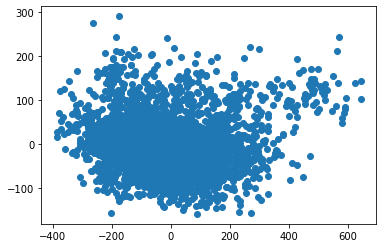

In [51]:
plt.scatter(kpca[:, 0], kpca[:, 1])
#plt.xlim(-5, 4)

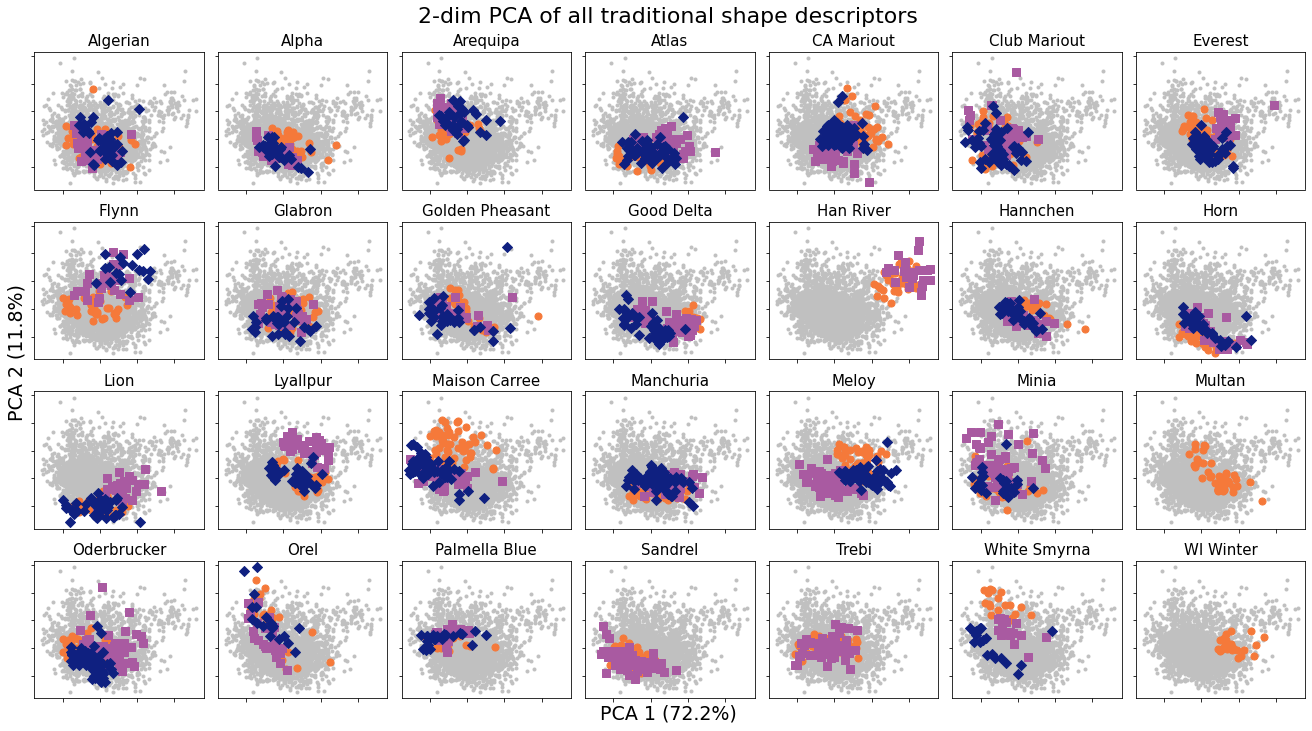

In [52]:
lim = .75
fs = 15
fig, ax = plt.subplots(4, 7, figsize=(18, 10), sharex=True, sharey=True)
colors = ['#601A4A', '#EE442F', '#63ACBE']
colors = ['#F5793A', '#A95AA1', '#0F2080', '#85C0F9']
marker = ['o', 's', 'D']
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        idx = i*ax.shape[1] + j
        line = founders_names_original[idx]
        accession = founders[founders.Founder == line]
        labels = accession['Label (C-G-S-P)'].unique()
        
        ax[i,j].scatter(kpca[:,0], kpca[:,1], c='silver', marker='.')
        #ax[i,j].set_xlim(-5, 4)
        #ax[i,j].set_ylim(-lim, lim)
        ax[i,j].tick_params(labelbottom=False, labelleft=False)
        ax[i,j].set_title(founders_names[idx], fontsize=fs)
        
        for k in range(len(labels)):
            seeds = kpca[founders['Label (C-G-S-P)'] == labels[k]]
            ax[i,j].scatter(seeds[:,0], seeds[:,1], c=colors[k], marker=marker[k], s=50)
        
fig.text(0.5, -0.01, 'PCA 1 (72.2%)', ha='center', fontsize=fs+4)
fig.text(-0.01, 0.5, 'PCA 2 (11.8%)', va='center', rotation='vertical', fontsize=fs+4)

#fig.suptitle('2-dim PCA of all ECTs (158 directions, 8 thresholds)', fontsize=fs+7)
fig.suptitle('2-dim PCA of all traditional shape descriptors', fontsize=fs+7)
fig.tight_layout()

filename = dst + 'trad_pca_2_dims_founders_spikes.jpg'
plt.savefig(filename, bbox_inches='tight', dpi=100, format='jpg', pil_kwargs={'optimize':True})

# KPCA

In [32]:
src = '../../preproc/norm_ect/results/'
dst = src
print(dst)

d = 158
TT = 8
founders_filename = src + 'combined_d{}_T{}.csv'.format(d,TT)
founders = pd.read_csv(founders_filename)

#combined_filename = src + 'kpca_normalized_size_combined_{}_{}_laplacedot_24_founders.csv'.format(d,TT)
combined_filename = src + 'kpca_normalized_size_traditional_{}_{}_rbfdot_2_founders.csv'.format(d,TT)
combined = pd.read_csv(combined_filename)

print(founders.shape)
founders.head()

../../preproc/norm_ect/results/
(3121, 1284)


,Scan,Color,Generation,Selection,Progeny,Label (C-G-S-P),Founder,Label,Tag,Length,...,10039,10047,10055,10063,10071,10079,10087,10095,10103,10111
0,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_10_0,82.15945,...,1,1,8,-7,-2,2,1,1,1,1
1,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_24_0,77.96905,...,1,1,2,0,1,1,1,1,1,1
2,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_20_0,73.92173,...,1,1,0,-6,1,1,1,1,1,1
3,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_11_0,79.44825,...,1,1,-1,1,2,1,1,1,1,1
4,S005,Red,0,5,19,R-48-5-19,Atlas,2,seed_9_0,81.29421,...,1,1,1,3,0,0,1,1,1,1


In [33]:
colnames = list(combined.columns.values)
rownames = list(combined.index.values)


#kpca = combined.loc[:, colnames[11:13]]# + [colnames[10+19]]]
kpca = combined.iloc[:, :2].values
print(np.median(kpca, axis=0))
kpca

[-0.02985879 -0.0276941 ]


array([[-0.02985879, -0.0276941 ],
       [-0.02985879, -0.0276941 ],
       [-0.02985879, -0.0276941 ],
       ...,
       [-0.02985879, -0.0276941 ],
       [-0.02985879, -0.0276941 ],
       [-0.02985879, -0.0276941 ]])

(-0.04, -0.02)

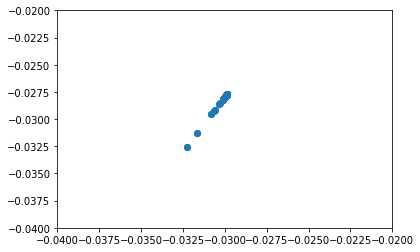

In [40]:
plt.scatter(kpca[:, 0], kpca[:, 1])
lim = 0.04
plt.xlim(-lim, -lim/2)
plt.ylim(-lim, -lim/2)

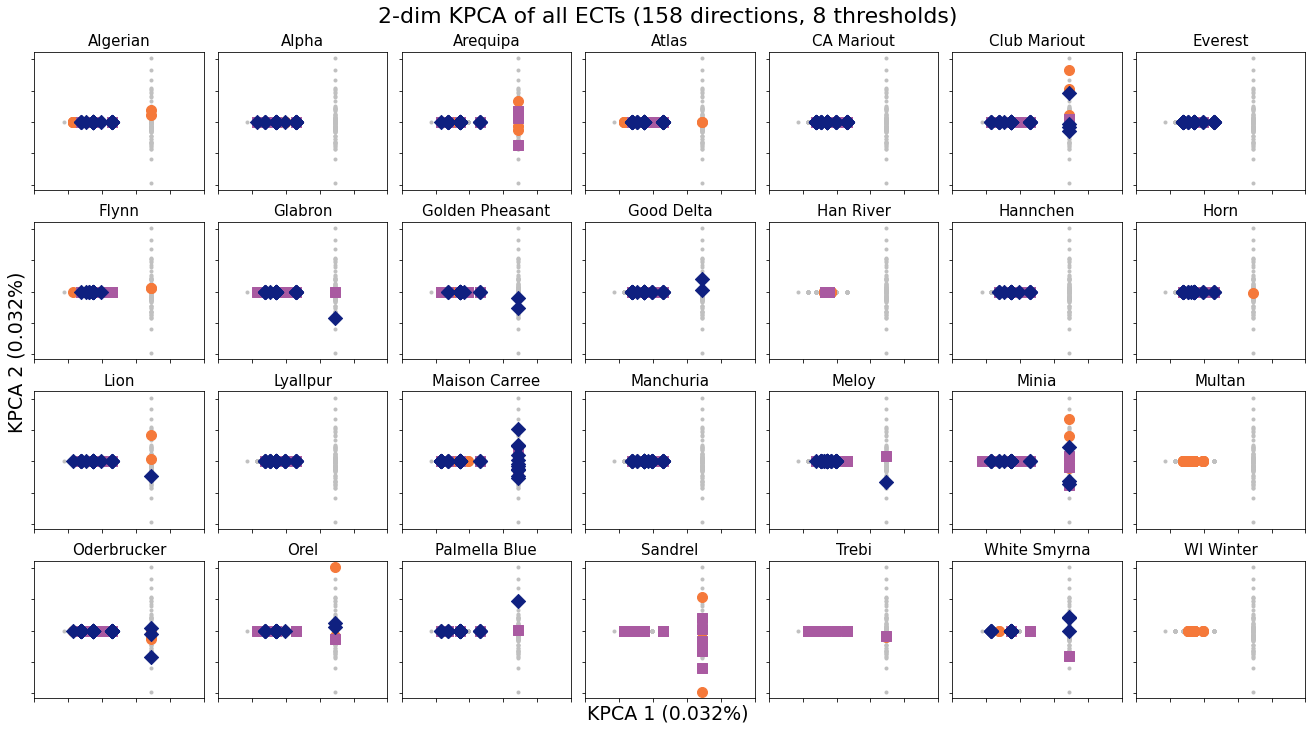

In [28]:
lim = .75
fs = 15
fig, ax = plt.subplots(4, 7, figsize=(18, 10), sharex=True, sharey=True)
colors = ['#601A4A', '#EE442F', '#63ACBE']
colors = ['#F5793A', '#A95AA1', '#0F2080', '#85C0F9']
marker = ['o', 's', 'D']
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        idx = i*ax.shape[1] + j
        line = founders_names_original[idx]
        accession = founders[founders.Founder == line]
        labels = accession['Label (C-G-S-P)'].unique()
        
        ax[i,j].scatter(kpca[:,0], kpca[:,1], c='silver', marker='.')
        ax[i,j].set_xlim(0, 0.05)
        #ax[i,j].set_ylim(-lim, lim)
        ax[i,j].tick_params(labelbottom=False, labelleft=False)
        ax[i,j].set_title(founders_names[idx], fontsize=fs)
        
        for k in range(len(labels)):
            seeds = kpca[founders['Label (C-G-S-P)'] == labels[k]]
            ax[i,j].scatter(seeds[:,0], seeds[:,1], c=colors[k], marker=marker[k], s=100)
        
fig.text(0.5, -0.01, 'KPCA 1 (0.032%)', ha='center', fontsize=fs+4)
fig.text(-0.01, 0.5, 'KPCA 2 (0.032%)', va='center', rotation='vertical', fontsize=fs+4)

fig.suptitle('2-dim KPCA of all ECTs (158 directions, 8 thresholds)', fontsize=fs+7)
fig.tight_layout()

filename = dst + 'kpca_2_dims_founders_spikes.jpg'
#plt.savefig(filename, bbox_inches='tight', dpi=100, format='jpg', pil_kwargs={'optimize':True})

# UMAP

In [42]:
src = '../../preproc/norm_ect/umap/'
dst = src

#umap_filename = src + 'umap_158_16_50_0.1_2_manhattan_unsupervised.csv'
umap_filename = src + 'umap_trad_74_4_50_0.1_2_manhattan_supervised.csv'
umap = np.loadtxt(umap_filename, delimiter=',')
umap = (umap - np.mean(umap, axis=0))/np.std(umap, axis=0)
print(umap.shape)

(3121, 2)


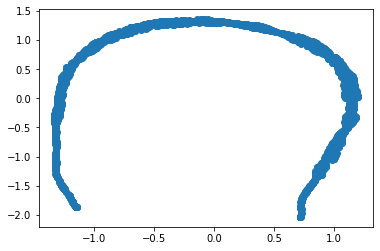

In [43]:
plt.scatter(umap[:,0], umap[:,1])

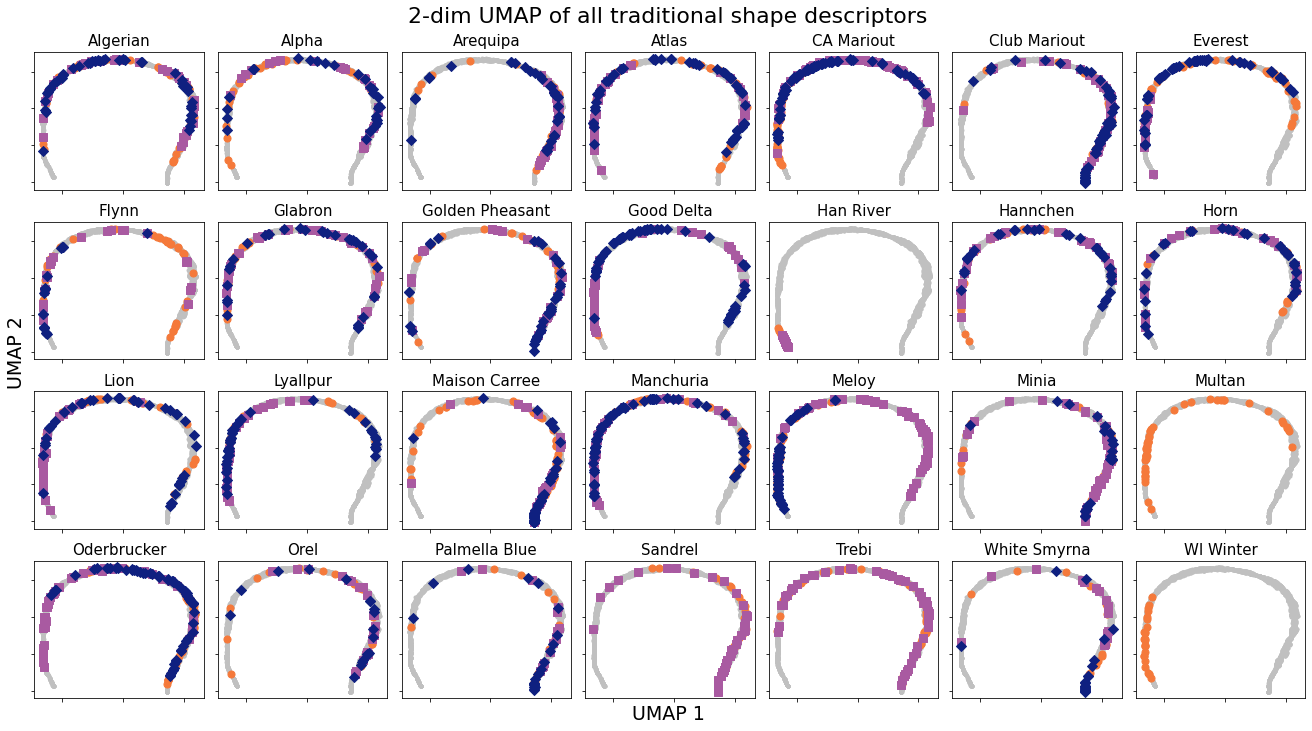

In [45]:
lim = .75
fs = 15
fig, ax = plt.subplots(4, 7, figsize=(18, 10), sharex=True, sharey=True)
colors = ['#601A4A', '#EE442F', '#63ACBE']
colors = ['#F5793A', '#A95AA1', '#0F2080', '#85C0F9']
marker = ['o', 's', 'D']
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        idx = i*ax.shape[1] + j
        line = founders_names_original[idx]
        accession = founders[founders.Founder == line]
        labels = accession['Label (C-G-S-P)'].unique()
        
        ax[i,j].scatter(umap[:,0], umap[:,1], c='silver', marker='.')
        ax[i,j].tick_params(labelbottom=False, labelleft=False)
        ax[i,j].set_title(founders_names[idx], fontsize=fs)
        
        for k in range(len(labels)):
            seeds = umap[founders['Label (C-G-S-P)'] == labels[k], :]
            ax[i,j].scatter(seeds[:,0], seeds[:,1], c=colors[k], marker=marker[k], s=50)
        
fig.text(0.5, -0.01, 'UMAP 1', ha='center', fontsize=fs+4)
fig.text(-0.01, 0.5, 'UMAP 2', va='center', rotation='vertical', fontsize=fs+4)

#fig.suptitle('2-dim unsupervised UMAP of all ECTs (158 directions, 16 thresholds)', fontsize=fs+7)
fig.suptitle('2-dim UMAP of all traditional shape descriptors', fontsize=fs+7)
fig.tight_layout()

filename = dst + 'trad_umap_2_dims_founders_spikes.jpg'
plt.savefig(filename, bbox_inches='tight', dpi=100, format='jpg', pil_kwargs={'optimize':True})

# Semisupervised UMAP

In [41]:
src = '../../preproc/norm_ect/ssumap/'
dst = src

umap_filename = src + 'umap_158_16_50_0.1_2_manhattan_ssupervised.csv'
umap = np.loadtxt(umap_filename, delimiter=',')
umap = (umap - np.mean(umap, axis=0))/np.std(umap, axis=0)
print(umap.shape)

(3121, 2)


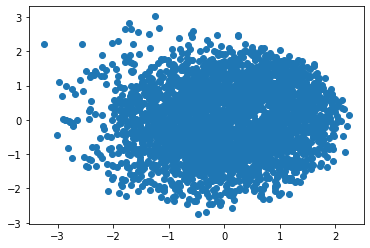

In [42]:
plt.scatter(umap[:,0], umap[:,1])

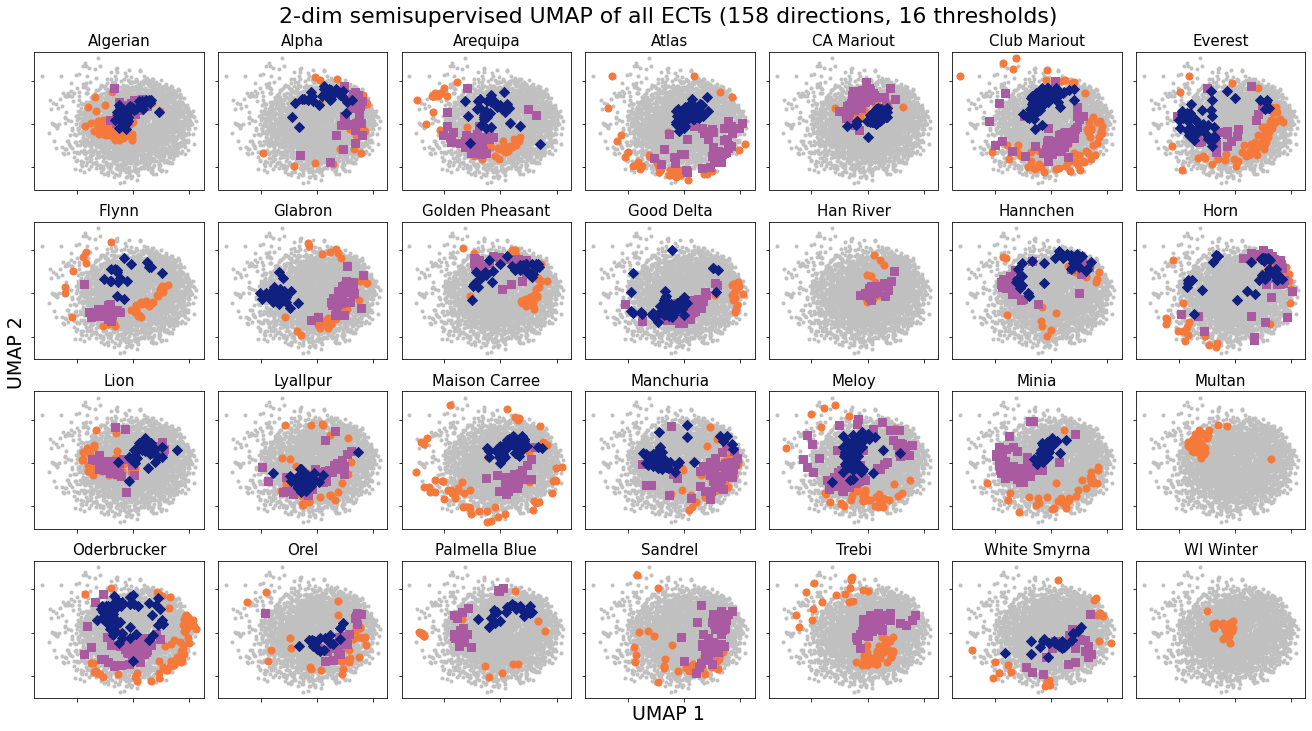

In [43]:
lim = .75
fs = 15
fig, ax = plt.subplots(4, 7, figsize=(18, 10), sharex=True, sharey=True)
colors = ['#601A4A', '#EE442F', '#63ACBE']
colors = ['#F5793A', '#A95AA1', '#0F2080', '#85C0F9']
marker = ['o', 's', 'D']
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        idx = i*ax.shape[1] + j
        line = founders_names_original[idx]
        accession = founders[founders.Founder == line]
        labels = accession['Label (C-G-S-P)'].unique()
        
        ax[i,j].scatter(umap[:,0], umap[:,1], c='silver', marker='.')
        ax[i,j].tick_params(labelbottom=False, labelleft=False)
        ax[i,j].set_title(founders_names[idx], fontsize=fs)
        
        for k in range(len(labels)):
            seeds = umap[founders['Label (C-G-S-P)'] == labels[k], :]
            ax[i,j].scatter(seeds[:,0], seeds[:,1], c=colors[k], marker=marker[k], s=50)
        
fig.text(0.5, -0.01, 'UMAP 1', ha='center', fontsize=fs+4)
fig.text(-0.01, 0.5, 'UMAP 2', va='center', rotation='vertical', fontsize=fs+4)

fig.suptitle('2-dim semisupervised UMAP of all ECTs (158 directions, 16 thresholds)', fontsize=fs+7)
fig.tight_layout()

filename = dst + 'ssumap_2_dims_founders_spikes.jpg'
plt.savefig(filename, bbox_inches='tight', dpi=100, format='jpg', pil_kwargs={'optimize':True})

# Supervised UMAP

In [44]:
src = '../../preproc/norm_ect/sumap/'
dst = src

umap_filename = src + 'umap_158_16_50_0.1_2_manhattan_supervised.csv'
umap = np.loadtxt(umap_filename, delimiter=',')
umap = (umap - np.mean(umap, axis=0))/np.std(umap, axis=0)
print(umap.shape)

(3121, 2)


(-3.0, 2.0)

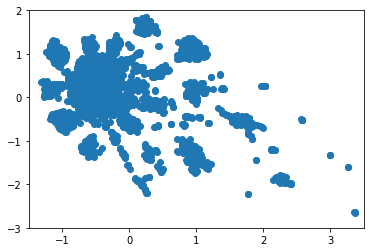

In [51]:
plt.scatter(umap[:,0], umap[:,1])
plt.xlim(-1.5, 3.5)
plt.ylim(-3, 2)

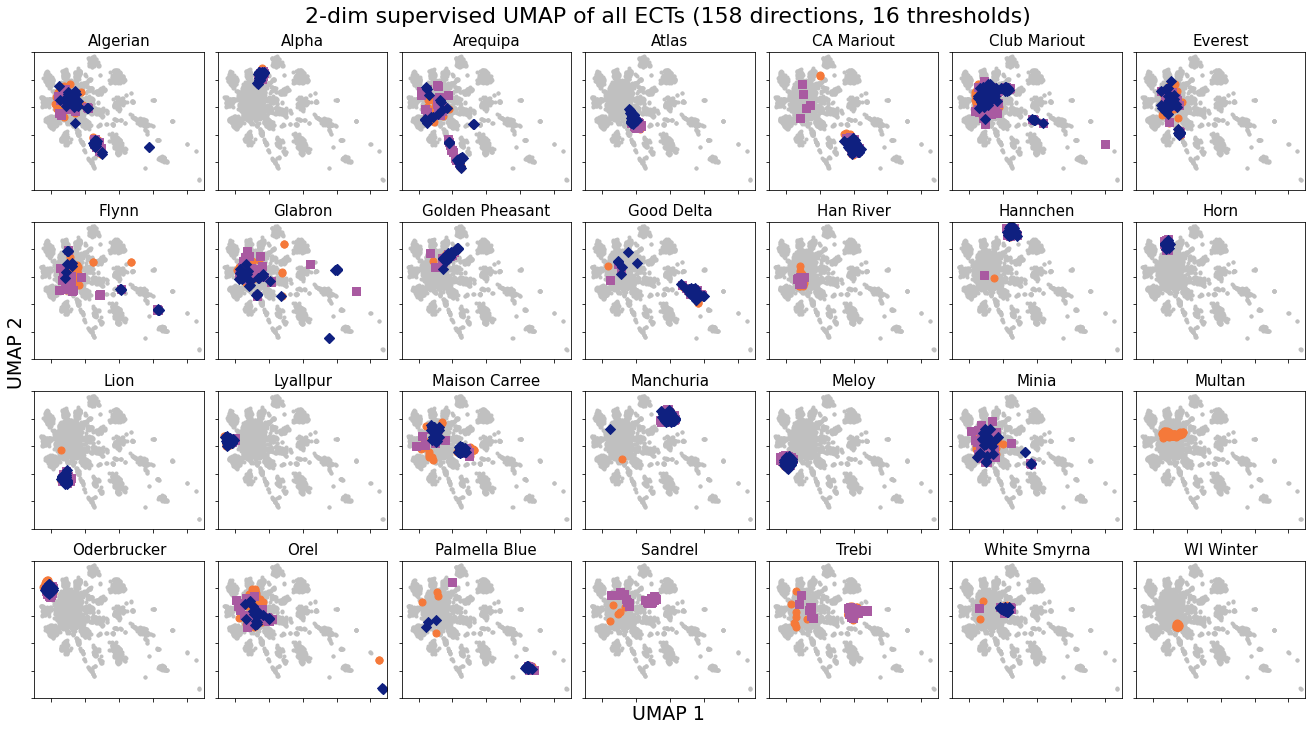

In [52]:
lim = .75
fs = 15
fig, ax = plt.subplots(4, 7, figsize=(18, 10), sharex=True, sharey=True)
colors = ['#601A4A', '#EE442F', '#63ACBE']
colors = ['#F5793A', '#A95AA1', '#0F2080', '#85C0F9']
marker = ['o', 's', 'D']
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        idx = i*ax.shape[1] + j
        line = founders_names_original[idx]
        accession = founders[founders.Founder == line]
        labels = accession['Label (C-G-S-P)'].unique()
        
        ax[i,j].scatter(umap[:,0], umap[:,1], c='silver', marker='.')
        ax[i,j].tick_params(labelbottom=False, labelleft=False)
        ax[i,j].set_title(founders_names[idx], fontsize=fs)
        ax[i,j].set_xlim(-1.5, 3.5)
        ax[i,j].set_ylim(-3, 2)
        
        for k in range(len(labels)):
            seeds = umap[founders['Label (C-G-S-P)'] == labels[k], :]
            ax[i,j].scatter(seeds[:,0], seeds[:,1], c=colors[k], marker=marker[k], s=50)
        
fig.text(0.5, -0.01, 'UMAP 1', ha='center', fontsize=fs+4)
fig.text(-0.01, 0.5, 'UMAP 2', va='center', rotation='vertical', fontsize=fs+4)

fig.suptitle('2-dim supervised UMAP of all ECTs (158 directions, 16 thresholds)', fontsize=fs+7)
fig.tight_layout()

filename = dst + 'sumap_2_dims_founders_spikes.jpg'
plt.savefig(filename, bbox_inches='tight', dpi=100, format='jpg', pil_kwargs={'optimize':True})

In [80]:
print(trad_dirs)
print(trad_dirs[kdirs[::-1]])

Index(['Length', 'Width', 'Height', 'HeightMax', 'Shell', 'Area', 'Vol',
       'ConvexArea', 'ConvexVol', 'ConvexAreaRatio', 'ConvexVolRatio'],
      dtype='object')
Index(['Length', 'Area', 'ConvexArea', 'Shell', 'ConvexVol', 'Vol', 'Width',
       'HeightMax', 'Height', 'ConvexVolRatio', 'ConvexAreaRatio'],
      dtype='object')


## Focus on Kruskal-Wallis, since it doesn't require any distribution assumptions

### Benjamini-Hochberg FDR correction

In [23]:
argpvals = np.argsort(kruskal[:,1])

In [53]:
Q = 1e-7
bh_thr = np.arange(1,1+len(argpvals))*Q/len(argpvals)
bh_critical = np.max(np.nonzero(kruskal[argpvals,1] < bh_thr)[0])
print(bh_critical,'\n')

dirs = argpvals[:(bh_critical+1)]
hvalues = kruskal[dirs, 0]
pvalues = kruskal[dirs, 1]

10 



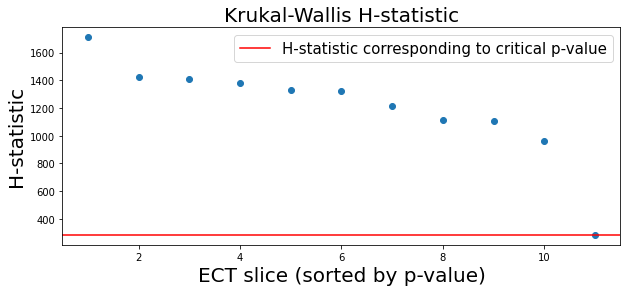

In [54]:
plt.figure(figsize=(10,4))
fs = 20

x = np.linspace(1e-35, len(argpvals),1000)

plt.scatter(np.arange(len(argpvals))+1, kruskal[argpvals,0])
plt.axhline(y=kruskal[argpvals[bh_critical],0], c='red', label='H-statistic corresponding to critical p-value')

plt.xlabel('ECT slice (sorted by p-value)', fontsize=fs)
plt.ylabel('H-statistic', fontsize=fs)
plt.legend(fontsize=fs-5)
plt.title('Krukal-Wallis H-statistic', fontsize=fs);

dst = '../../preproc/temp/seeds/'
filename = dst + 'kruskal_wallis_statistic.jpg'
#plt.savefig(filename, format='jpg', dpi=100, bbox_inches='tight', pil_kwargs={'optimize':True})

In [88]:
kdirs[::-1] + 9

array([ 9, 14, 16, 13, 17, 15, 10, 12, 11, 19, 18])

In [85]:
trad_traits = trad_dirs.values.copy()
trad_traits[2] = 'HeightA'
trad_traits[3] = 'HeightB'
trad_traits

array(['Length', 'Width', 'HeightA', 'HeightB', 'Shell', 'Area', 'Vol',
       'ConvexArea', 'ConvexVol', 'ConvexAreaRatio', 'ConvexVolRatio'],
      dtype=object)

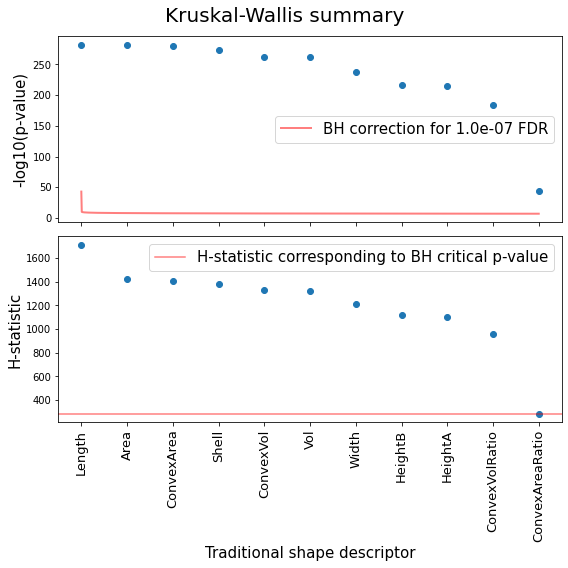

In [84]:
fig, ax = plt.subplots(2,1,figsize=(8,8))
fs = 15

x = np.linspace(1e-35, len(argpvals)-1,1000)
i=1
ax[i].scatter(np.arange(len(argpvals)), kruskal[argpvals,0])
ax[i].axhline(y=kruskal[argpvals[bh_critical],0], alpha=0.5, c='red', label='H-statistic corresponding to BH critical p-value')
ax[i].set_ylabel('H-statistic', fontsize=fs)
ax[i].legend(fontsize=fs)

i=0
ax[i].plot(x, -np.log10(x*Q/len(argpvals)), lw=2, c='red', alpha=0.5, label='BH correction for {:.1e} FDR'.format(Q))
ax[i].scatter(np.arange(len(argpvals)), -np.log10(kruskal[argpvals,1]))
ax[i].set_ylabel('-log10(p-value)', fontsize=fs)
ax[i].legend(fontsize=fs)
#plt.title('Krukal-Wallis p-values'.format(Q), fontsize=fs);

ax[0].set_xticks(np.arange(len(argpvals)))
ax[0].tick_params('x', labelbottom=False)

ax[1].set_xticks(np.arange(len(argpvals)))
ax[1].set_xticklabels(trad_traits[kdirs[::-1]])
ax[1].tick_params('x', labelrotation=90, labelsize=fs-2)
ax[1].set_xlabel('Traditional shape descriptor', fontsize=fs)
plt.suptitle('Kruskal-Wallis summary', fontsize=fs+5)
plt.tight_layout()
dst = '../../preproc/temp/seeds/'
filename = dst + 'kruskal_wallis_trad_summary.jpg'
plt.savefig(filename, format='jpg', dpi=150, bbox_inches='tight', pil_kwargs={'optimize':True})

<ipython-input-29-099d4bf1f424>:12: RuntimeWarning: divide by zero encountered in log10
  ax[i].scatter(np.arange(len(argpvals))+1, -np.log10(kruskal[argpvals,1]))


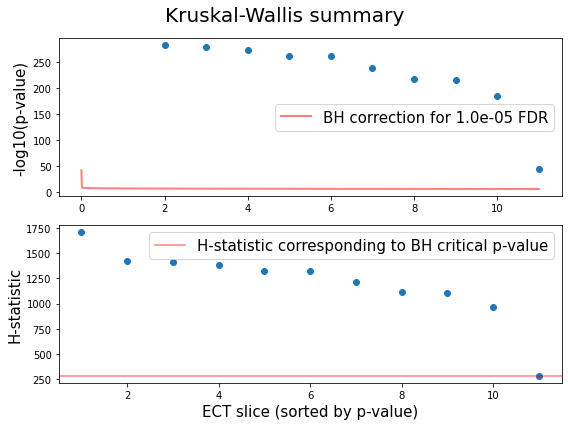

In [29]:
fig, ax = plt.subplots(2,1,figsize=(8,6))
fs = 15

x = np.linspace(1e-35, len(argpvals),1000)
i=1
ax[i].scatter(np.arange(len(argpvals))+1, kruskal[argpvals,0])
ax[i].axhline(y=kruskal[argpvals[bh_critical],0], alpha=0.5, c='red', label='H-statistic corresponding to BH critical p-value')
ax[i].set_ylabel('H-statistic', fontsize=fs)
ax[i].legend(fontsize=fs)
i=0
ax[i].plot(x, -np.log10(x*Q/len(argpvals)), lw=2, c='red', alpha=0.5, label='BH correction for {:.1e} FDR'.format(Q))
ax[i].scatter(np.arange(len(argpvals))+1, -np.log10(kruskal[argpvals,1]))
ax[i].set_ylabel('-log10(p-value)', fontsize=fs)
ax[i].legend(fontsize=fs)
#plt.title('Krukal-Wallis p-values'.format(Q), fontsize=fs);

ax[1].set_xlabel('ECT slice (sorted by p-value)', fontsize=fs)
plt.suptitle('Kruskal-Wallis summary', fontsize=fs+5)
plt.tight_layout()
dst = '../../preproc/temp/seeds/'
filename = dst + 'kruskal_wallis_summary.jpg'
#plt.savefig(filename, format='jpg', dpi=150, bbox_inches='tight', pil_kwargs={'optimize':True})

In [16]:
import demeter.directions as dirss

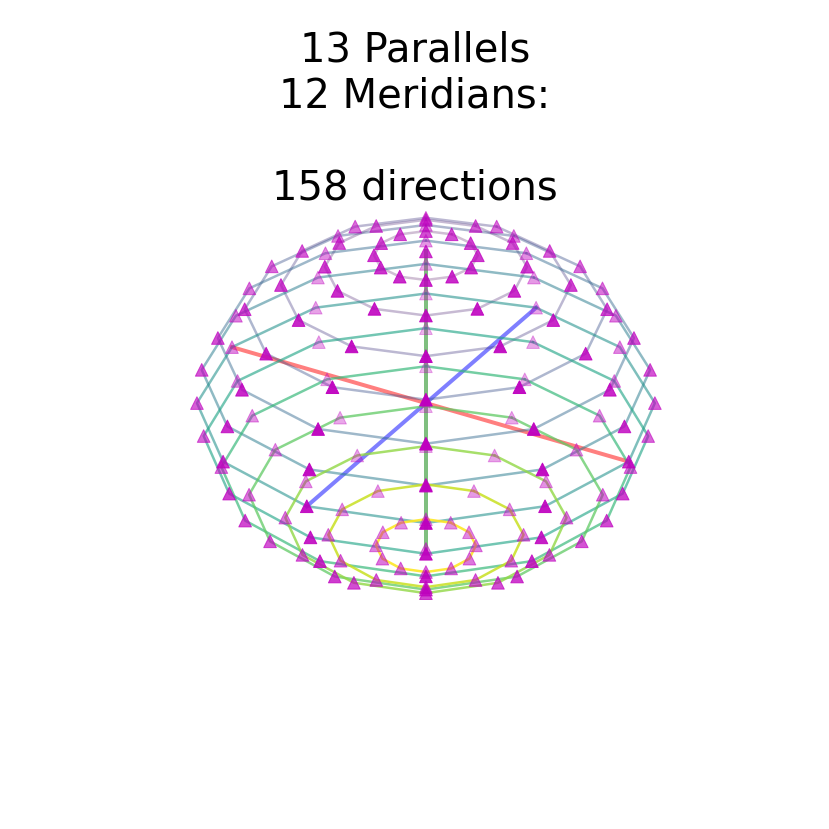

In [17]:
parallels = 7
meridians = 12
pdirections = dirss.pole_directions(parallels,meridians,x=1,y=0,z=2)

title = '{} Parallels\n{} Meridians:\n\n{} directions'.format(parallels*2-1, meridians, len(pdirections))

dirss.plot_pole_directions(pdirections, title, parallels, meridians, save_fig=False)

In [20]:
dindex = dirs//TT
dthold = dirs%TT
for i in range(len(dindex)):
    vals = [dirs[i], hvalues[i], pvalues[i], dindex[i], dthold[i], *pdirections[dindex[i],]]
    print('{}\t{:.2f}\t{:.2e}\t->\t{}\t{}\t{:.3f}\t{:.3f}\t{:.3f}'.format(*vals))

32	293.18	1.65e-46	->	4	0	0.223	0.000	0.975
1216	236.03	2.89e-35	->	152	0	-0.111	-0.193	-0.975
1184	220.62	2.78e-32	->	148	0	0.223	0.000	-0.975
1248	212.61	9.67e-31	->	156	0	-0.111	0.193	-0.975
1136	210.34	2.63e-30	->	142	0	-0.434	0.000	-0.901
0	206.63	1.35e-29	->	0	0	0.000	0.000	1.000
1224	187.54	5.70e-26	->	153	0	-0.193	-0.111	-0.975
16	153.27	1.31e-19	->	2	0	0.111	0.193	0.975
1240	152.87	1.54e-19	->	155	0	-0.193	0.111	-0.975
1208	148.72	8.77e-19	->	151	0	0.000	-0.223	-0.975
72	148.49	9.64e-19	->	9	0	-0.193	-0.111	0.975
1192	147.07	1.75e-18	->	149	0	0.193	-0.111	-0.975
48	141.80	1.55e-17	->	6	0	0.111	-0.193	0.975
1200	137.67	8.52e-17	->	150	0	0.111	-0.193	-0.975
40	136.86	1.19e-16	->	5	0	0.193	-0.111	0.975
1160	135.98	1.70e-16	->	145	0	0.000	0.223	-0.975
1	135.58	2.00e-16	->	0	1	0.000	0.000	1.000
1176	135.18	2.36e-16	->	147	0	0.193	0.111	-0.975
192	127.08	6.37e-15	->	24	0	-0.217	0.376	0.901
1128	124.50	1.79e-14	->	141	0	-0.376	-0.217	-0.901
1168	123.90	2.29e-14	->	146	0	0.111	0.193	-

In [ ]:
filename = dst + 'relevant_directions_{:.0e}.csv'.format(Q)
np.savetxt(filename, np.column_stack((dindex,dthold, pdirections[dindex,:])), delimiter=',')